<a href='https://www.darshan.ac.in/'> <img src='https://www.darshan.ac.in/Content/media/DU_Logo.svg' width="250" height="300"/></a>
<pre>
<center><b><h1>Machine Learning - 2301CS621</b></center>

<center><b><h1>Lab - 7</b></center>    
<pre>    

### Namra Pithwa
### 23010101641
### 17/01/2025

# Ml Algorithm K-fold Cross Validation 

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, mean_squared_error
import matplotlib.pyplot as plt

# Load the diabetes dataset

In [2]:
file_path = 'diabetes.csv'
diabetes_df = pd.read_csv(file_path)

# Prepare the dataset

In [3]:
X = diabetes_df.drop(columns=['Outcome'])
y = diabetes_df['Outcome'].map({'Non Diabetic': 0, 'Diabetic': 1})  # Encode target variable

# Define the models

In [4]:
models = {
    "Naive Bayes": GaussianNB(),
    "SVM": SVC(kernel='linear', random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

# Dictionary to store results

In [5]:
results = {}

# Perform K-Fold Cross Validation

In [7]:
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
    results[name] = {
        "Metric": "Accuracy",
        "Mean Accuracy": np.mean(scores),
        "Std Dev": np.std(scores)
    }

# Linear Regression (treated separately due to its regression nature)

In [8]:
linear_reg_model = LinearRegression()
linear_reg_scores = []
for train_index, test_index in kfold.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    linear_reg_model.fit(X_train, y_train)
    y_pred = np.round(linear_reg_model.predict(X_test))  # Round predictions to nearest class
    mse = mean_squared_error(y_test, y_pred)
    linear_reg_scores.append(mse)
results["Linear Regression"] = {
    "Metric": "Mean Squared Error",
    "Mean Accuracy": np.mean(linear_reg_scores),
    "Std Dev": np.std(linear_reg_scores)
}

# Display the results as a DataFrame

In [9]:
results_df = pd.DataFrame(results).T
print(results_df)

                               Metric Mean Accuracy   Std Dev
Naive Bayes                  Accuracy      0.755161  0.050206
SVM                          Accuracy      0.770779  0.023912
Decision Tree                Accuracy      0.702939  0.060909
Linear Regression  Mean Squared Error      0.231801    0.0261


# Visualize the results

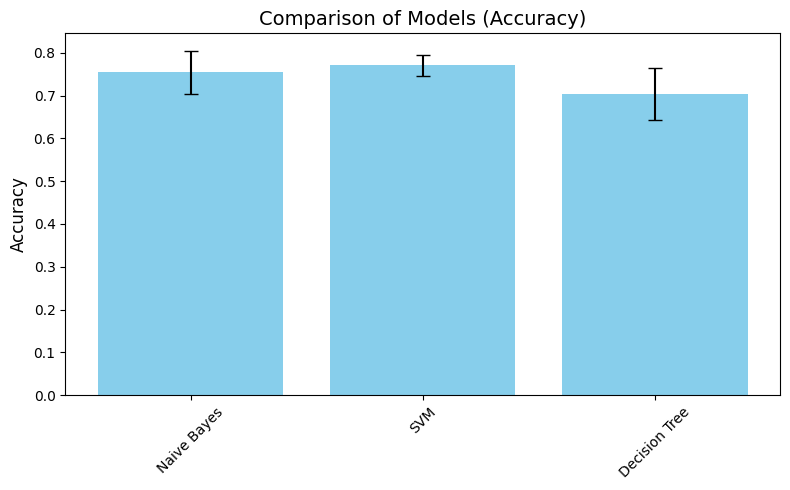

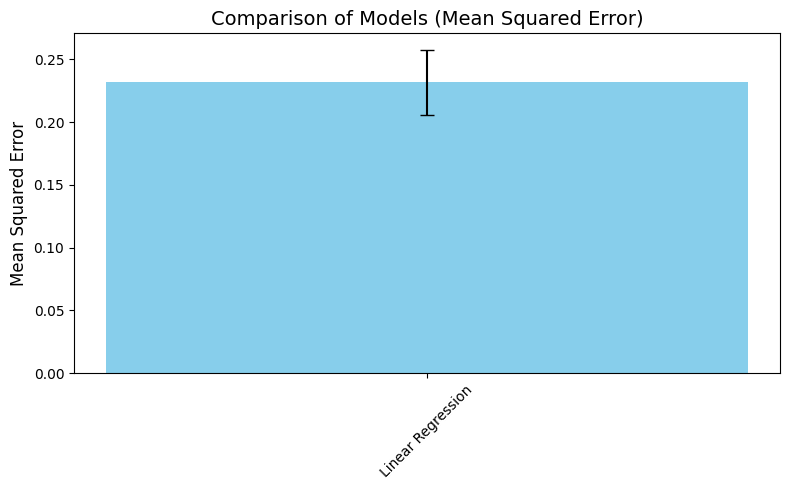

In [10]:
metrics = results_df["Metric"].unique()
for metric in metrics:
    filtered_results = results_df[results_df["Metric"] == metric]
    plt.figure(figsize=(8, 5))
    plt.bar(filtered_results.index, filtered_results["Mean Accuracy"], yerr=filtered_results["Std Dev"], color='skyblue', capsize=5)
    plt.title(f"Comparison of Models ({metric})", fontsize=14)
    plt.ylabel(metric, fontsize=12)
    plt.xticks(rotation=45, fontsize=10)
    plt.tight_layout()
    plt.show()
